## Adatok beolvasása

Importok:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import hashlib
import string
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint as sp_randint
from collections import Counter
from mpl_toolkits.basemap import Basemap
from folium.plugins import HeatMap
import folium
from geopy.geocoders import Nominatim
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
def load_data(path):
 csv_path = os.path.join(path, "zomato.csv")
 return pd.read_csv(csv_path)

zomato = load_data("datasets")

Adatok összekeverése annak érdekében, hogy esetleges mintákat elimináljuk a kezdeti adatbázisban.

In [3]:
zomato = shuffle(zomato)
zomato.reset_index(inplace=True, drop=True)

In [4]:
backup_zomato = zomato.copy()

In [5]:
zomato

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/calorie-expre...,"7/43 First floor, 3rd cross, 4th Main, Kaverap...",Calorie Express,Yes,No,3.6/5,192,+91 9663868626,BTM,Delivery,Chicken Sandwich,Healthy Food,450,"[('Rated 4.0', 'RATED\n This place offers rea...",[],Delivery,Koramangala 4th Block
1,https://www.zomato.com/bangalore/minimelts-bri...,"5th, Avenue Mall, Brigade Road, Bangalore",MiniMelts,No,No,3.9/5,66,080 41225834,Brigade Road,Dessert Parlor,NaN,"Ice Cream, Desserts",200,"[('Rated 4.0', 'RATED\n At the entrance of fi...",[],Delivery,Brigade Road
2,https://www.zomato.com/bangalore/spicy-hub-1-b...,"Near Suncity Corporate Leisure Apartments, Iblur",Spicy Hub,No,No,3.0 /5,26,+91 8867395867\n080 65469708,Bellandur,Quick Bites,NaN,North Indian,400,"[('Rated 3.5', ""RATED\n Roti is amazing.\nI l...",[],Delivery,Sarjapur Road
3,https://www.zomato.com/bangalore/blu-dale-fast...,"23, Buddanna Building, Ejipura Main Road, Ejip...",Blu Dale Fast Food,No,No,3.3 /5,7,080 25711433\n+91 9986414014,Ejipura,Quick Bites,NaN,"Chinese, North Indian, Andhra, Seafood",250,"[('Rated 3.5', 'RATED\n typical small restaur...",[],Dine-out,Koramangala 7th Block
4,https://www.zomato.com/bangalore/lost-in-pizza...,"1821, Garden Layout, Sector 2, 24th Main Road,...",Lost in Pizza,Yes,No,3.1/5,4,+91 7065706509,HSR,Takeaway,NaN,"Pizza, Fast Food",600,"[('Rated 1.0', 'RATED\n I actually prefer giv...",[],Delivery,HSR
5,https://www.zomato.com/bangalore/milk-n-shakes...,"639, Near JP Dental Clinic, Koramangala 8th Bl...",Milk N Shakes,Yes,No,3.7 /5,47,+91 6362242224,Koramangala 8th Block,Beverage Shop,NaN,Beverages,300,"[('Rated 5.0', 'RATED\n Great shakes great ta...","['Belgian Chocolate Shake', 'Ferrero Rocher Sh...",Delivery,Koramangala 7th Block
6,https://www.zomato.com/bangalore/the-fiery-ind...,"676, SY No 5/2, Singasandra, Electronic City, ...",The Fiery Indian Kitchen,Yes,No,NaN,0,+91 9945819977\r\n+91 9880379697,Electronic City,Casual Dining,NaN,North Indian,650,[],[],Delivery,HSR
7,https://www.zomato.com/bangalore/fennys-lounge...,"115, 3rd Floor, Opposite Raheja Arcade, Korama...",Fenny's Lounge And Kitchen,No,Yes,4.5 /5,6377,080 49653085,Koramangala 7th Block,"Bar, Casual Dining","Caramel Pudding, Cocktails, Pizza, Mocktails, ...","Mediterranean, Pizza, Continental, Seafood, Salad","1,600","[('Rated 3.0', ""RATED\n I have heard a lot ab...",[],Drinks & nightlife,Koramangala 5th Block
8,https://www.zomato.com/bangalore/east-the-oter...,"The Oterra, 43, Phase 1, Electronic City, Bang...",East- The Oterra,No,Yes,4.0/5,54,080 39854551\r\n+91 9620800559,Electronic City,Fine Dining,Wasabi Prawns,"Chinese, Vietnamese, Thai, Malaysian","2,200","[('Rated 5.0', 'RATED\n Visited Hotel Oterra ...",[],Dine-out,Electronic City
9,https://www.zomato.com/bangalore/the-chocolate...,"G8/9/10, Ashoka Plaza, Kamaraj Road, Commercia...",The Chocolate Heaven,No,No,NEW,0,+91 6363926944\r\n080 41120254,Commercial Street,"Dessert Parlor, Cafe",NaN,"Desserts, Cafe",600,"[('Rated 5.0', 'RATED\n Lovely place with gre...",[],Cafes,Frazer Town


In [6]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [7]:
print(len(set(zomato['url'])))
print(len(set(zomato['name'])))
print(len(set(zomato['phone'])))
print(zomato['rate'].value_counts())

51717
8792
14927
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
3.8 /5    1851
3.7 /5    1810
3.6/5     1773
4.0/5     1609
4.0 /5    1574
3.6 /5    1543
4.1 /5    1474
4.1/5     1474
3.5/5     1431
3.5 /5    1353
3.4/5     1259
3.4 /5    1217
3.3/5     1168
4.2 /5    1165
3.3 /5    1142
4.2/5     1019
3.2/5     1006
4.3 /5     917
3.2 /5     867
3.1/5      862
4.3/5      776
3.1 /5     699
4.4 /5     628
3.0/5      558
4.4/5      519
          ... 
2.8/5      313
2.8 /5     287
4.5/5      247
4.6 /5     175
2.7/5      170
2.6/5      143
2.7 /5     137
4.6/5      125
2.6 /5     117
4.7 /5      86
4.7/5       81
-           69
2.5 /5      56
2.5/5       45
4.8 /5      43
2.4/5       40
2.4 /5      30
4.9 /5      30
2.3/5       28
4.9/5       25
4.8/5       23
2.3 /5      23
2.2/5       19
2.1 /5      13
2.1/5       11
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64


## A feleslegesnek vélt attribútumok eldobása

In [8]:
zomato = zomato.drop(['url',  'phone', 'location', 'rest_type', 'reviews_list', 'menu_item'], axis=1)

## Az adatbázis tanító és teszt szettekre felbontásáért felelős függvények

In [9]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
 return data.loc[~in_test_set], data.loc[in_test_set]

def test_set_check(identifier, test_ratio, hash):
 return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


## Szöveges oszlopok átalakítására való függvények

In [10]:
def yesNoConverter(column):
    encoder=LabelEncoder()
    column_converted=encoder.fit_transform(column)
    return column_converted

In [11]:
def label_factorize(df):
    for col in df.columns[~df.columns.isin(['rate', 'approx_cost(for two people)', 'votes', 'listed_in(type)', 'listed_in(city)'])]:
        df[col] = df[col].factorize()[0]
    return df

In [12]:
def one_hotTransformer(zomato_encoded):
    encoder = OneHotEncoder(categories='auto')
    zomato_cat_1hot = encoder.fit_transform(zomato_encoded.reshape(-1,1))
    return zomato_cat_1hot

In [13]:
type_labels = list()
city_labels = list()

def labelEncoder(column, city):
    global type_labels
    global city_labels
    encoder = LabelEncoder()
    zomato_cat_encoded = encoder.fit_transform(column)
    if city:
        city_labels = list(encoder.classes_)
    else:
        type_labels = list(encoder.classes_)
    
    return zomato_cat_encoded

## A 'rate' oszlop megtisztítására való függvény

Eredetileg '4.1 / 5', 'NEW', '-', '3.5/5' formákban találhatóak az adatok.
Ezekből csak az első tag kellene, a szöveges információkat pedig nan értékekkel helyettesítjük.

In [14]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

def cleanRates(data):
    if(isinstance(data, float)):
        return data
    else:
        cleanData = data.translate({ord(c): None for c in string.whitespace})
        vote = cleanData.split('/')
        if (isfloat(vote[0])):
            return float(vote[0])
        else:
            return np.nan

## Medián kiszámítására használatos függvény

Minden olyan adatot, amit később fel kell használni a teszt szettel való műveletek során, egy-egy globális dictionary-be mentjük el.
Az egyes oszlopokhoz tartozó értékek az oszlop neve alapján érthetőek el (ez a kulcs).

In [15]:
def calculateMedianByColumnName(column, column_name):
    items_cleaned = []
    numpy_array = np.array(column)
    for x in numpy_array:
        if not np.isnan(x):
            items_cleaned.append(x)
            
    global median      
    median[column_name] = np.median(items_cleaned)
    return median[column_name]

In [16]:
# csak inicializálás, hogy meglegyenek globálisan
median = dict()

def replaceNanByMedian(column, column_name, training):
    if training:
        global median
        median[column_name] = calculateMedianByColumnName(column, column_name)
        
    column_cleaned = []
    numpy_array = np.array(column)
    for x in numpy_array:
        if np.isnan(x):
            column_cleaned.append(median[column_name])
        else:
            column_cleaned.append(x)
    return column_cleaned

## Standard és MinMax skálázó függvények

In [17]:
# csak inicializálás, hogy meglegyenek globálisan
mean = dict()
variance = dict()

def standardScaler(column, column_name, training):
    if training:
        global mean
        mean[column_name] = np.mean(column)
        global variance
        variance[column_name] = np.var(column)
        
    standardizedCol = []
    for x in column:
        standardizedCol.append((x - mean[column_name]) / variance[column_name])
   
    return standardizedCol

In [18]:
# csak inicializálás, hogy meglegyenek globálisan
min_value = dict()
max_value = dict()

def Normalize(column, column_name, training):
    if training:
        global min_value
        min_value[column_name] = float(column.min())
        global max_value
        max_value[column_name] = float(column.max())
        
    column_substract = []
    for x in column:
        column_substract.append((float(x)-min_value[column_name])/(max_value[column_name]-min_value[column_name]))
    return column_substract

### Apróbb függvény, ami a tizedesvesszőt tartalmazó számadatokból kiveszi a tizedesvesszőt. (Tizedesvesszővel string formátumban vannak)

In [19]:
def ConvertFromMoneyToString(column):
    column_converted = []
    for x in column:
        if not isfloat(x):
            x = x.replace(",", "")
            column_converted.append(float(x))
        else:
            column_converted.append(float(x))
    return column_converted

## Az eredmények megjelenítéséért felelős függvények

In [20]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    print("\n")

In [21]:
def displayLinRegPredictions(lin_reg, train_set_ready_df, labels_ready):
    some_data = train_set_ready_df.iloc[:5]
    #some_data = train_set.iloc[:5]
    some_labels = pd.DataFrame(data=labels_ready).iloc[:5]

    print("Predictions:\t", lin_reg.predict(train_set_ready_df.iloc[:5]))
    print("Labels:\t\t", some_labels)
    print("\n")

In [22]:
statistic_table = pd.DataFrame()

def printToStatistics(name, rmse, details, pg, mean='Nan', sd='NaN'):
    global statistic_table 
    statistic_table = statistic_table.append({'name' : name , 
                                              'rmse' : rmse , 
                                              'details' : details,
                                              'mean' : mean,
                                              'standard deviation' : sd,
                                              'purging' : pg
                                             } , ignore_index=True)

In [23]:
test_statistic_table = pd.DataFrame()

def printToTestStatistics(name, score):
    global test_statistic_table 
    test_statistic_table = test_statistic_table.append({'name' : name , 
                                              'score' : score
                                             } , ignore_index=True)

## Saját pipeline egy függvény formájában

A szükséges helyeken a hiányzó értékeket -1-ekkel töltjük fel, mert ez adta a legjobb eredményt. 
A paraméterben megadható skálázóval skálázzuk a megfelelő attribútumokat az adat "megtisztítása" után (pl. string --> float).
Némely paraméterre OneHot kódolót is használunk, mert így sikerült a legjobb eredményt elérni.
Miután minden paramétert feldolgoztunk, egy mátrixot rakunk össze a paraméterekből.

In [24]:
# csak hogy globális legyen
zomato_labels =  []

def runPipeline(dataset, training, scaler):
    dataset_ready = dataset.copy()
    
    dataset_ready = label_factorize(dataset_ready)
    #dataset_ready = dataset_ready.drop(['rate'], axis=1).fillna(-1) #filling nan values by -1
    dataset_ready['name'] = dataset_ready['name'].fillna(-1)
    dataset_ready['cuisines'] = dataset_ready['cuisines'].fillna(-1)
    dataset_ready['dish_liked'] = dataset_ready['dish_liked'].fillna(-1)
    dataset_ready['address'] = dataset_ready['address'].fillna(-1)
    
    dataset_ready['online_order'] = yesNoConverter(dataset_ready['online_order'])
    dataset_ready['book_table'] = yesNoConverter(dataset_ready['book_table'])
    
    dataset_type_encoded = labelEncoder(dataset_ready['listed_in(type)'], False)
    dataset_type_encoded_oneHot = one_hotTransformer(dataset_type_encoded)
        
    dataset_city_encoded = labelEncoder(dataset_ready['listed_in(city)'], True)
    dataset_city_encoded_oneHot = one_hotTransformer(dataset_city_encoded)
    
    dataset_ready['approx_cost(for two people)'] = ConvertFromMoneyToString(dataset_ready['approx_cost(for two people)'])
    dataset_ready['approx_cost(for two people)'] = replaceNanByMedian(dataset_ready['approx_cost(for two people)'], "approx_cost(for two people)", training)
    dataset_ready['approx_cost(for two people)'] = scaler(dataset_ready['approx_cost(for two people)'], "approx_cost(for two people)", training)
    dataset_ready['name'] = scaler(dataset_ready['name'], "name", training)
    dataset_ready['address'] = scaler(dataset_ready['address'], "address", training)
    dataset_ready['dish_liked'] = scaler(dataset_ready['dish_liked'], "dish_liked", training)
    dataset_ready['cuisines'] = scaler(dataset_ready['cuisines'], "cuisines", training)
    dataset_ready['votes'] = scaler(dataset_ready['votes'], "votes", training)
    dataset_num = dataset_ready.drop(['listed_in(type)', 'listed_in(city)', 'rate'], axis=1)
    dataset_ready = np.concatenate((np.concatenate((dataset_num, dataset_type_encoded_oneHot.toarray()), axis=1), dataset_city_encoded_oneHot.toarray()), axis=1)
    return dataset_ready

## Az adat betanítására, majd a betanított adatbázison modelleken való futtatására vaó függvény

Nem ad vissza adatot, futás közben az összes modellel produkált eredményt sorban kiírja.

In [25]:
def trainDataWithGivenScalerAndRunAllModels(dataset, labels, scaler, details, purging):
    dataset_ready = runPipeline(dataset, True, scaler)
    dataset_ready_df = pd.DataFrame(dataset_ready)
    
    # Lineáris regresszió    
    lin_reg = LinearRegression()
    lin_reg.fit(dataset_ready, labels)
    train_set_predictions = lin_reg.predict(dataset_ready_df)
    lin_mse = mean_squared_error(labels, train_set_predictions)
    lin_rmse = np.sqrt(lin_mse)
    printToStatistics('LinearRegression', lin_rmse, details, purging, lin_rmse)
    print("Linear Regression with", details)
    displayLinRegPredictions(lin_reg, dataset_ready_df, labels)
    
    # Döntési fa
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(dataset_ready, labels)
    train_set_predictions = tree_reg.predict(dataset_ready_df)
    tree_mse = mean_squared_error(labels, train_set_predictions)
    tree_rmse = np.sqrt(tree_mse)
    decision_tree_scores = cross_val_score(tree_reg, dataset_ready_df, labels, scoring="neg_mean_squared_error", cv=10)
    tree_rmse_scores = np.sqrt(-decision_tree_scores)
    printToStatistics('DecisionTreeRegressor', tree_rmse, details, purging, tree_rmse_scores.mean(), tree_rmse_scores.std())
    print("Decision Tree with", details)
    display_scores(tree_rmse_scores)
    
    # Random forest
    forest_reg = RandomForestRegressor(10)
    forest_reg.fit(dataset_ready_df, pd.DataFrame(data=labels).values.ravel())
    train_set_predictions = forest_reg.predict(dataset_ready_df)
    forest_mse = mean_squared_error(labels, train_set_predictions)
    forest_rmse = np.sqrt(forest_mse)
    forest_scores = cross_val_score(forest_reg, dataset_ready_df, pd.DataFrame(data=labels).values.ravel(), scoring="neg_mean_squared_error", cv=10)
    forest_rmse_scores = np.sqrt(-forest_scores)
    printToStatistics('RandomForestRegressor', forest_rmse, details, purging, forest_rmse_scores.mean(), forest_rmse_scores.std())
    print("Random forest with", details)
    display_scores(forest_rmse_scores)

## Vizualizáló függvények

Attribútumok fontosságát vizualizáló függvény

In [26]:
def plot_importances(model, cols):
    plt.figure(figsize=(12,6))
    f_imp = pd.Series(model.feature_importances_, index=cols).sort_values(ascending=True)
    f_imp.plot(kind='barh')

Az éttermeket térképen elhelyező vizualizáció alapjának generálását végző függvény.

In [27]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

## Az adatbázis kezdeti feldolgozása

Cél attribútum üres értéket tartalmazó soroait eldobjuk (ehhez előbb szükséges az értékelések átalakítása nekünk megfelelő (4.1/5 --> 4.1) formába).
Majd tanító és teszt szettekre bontása.

In [28]:
#MAIN
dataset = zomato.copy()
cleaned_rate_labels = []
        
dataset = dataset.loc[dataset['rate'] !='NEW']
dataset = dataset.loc[dataset['rate'] !='-'].reset_index(drop=True)

for n in dataset['rate']:
    cleaned_rate_labels.append(float(cleanRates(n)))
dataset['rate'] = cleaned_rate_labels
dataset = dataset.drop(dataset[np.isnan(dataset['rate'])].index)

dataset = dataset.reset_index()

train_set, test_set = split_train_test_by_id(dataset, 0.2, "index")

train_labels = train_set['rate']
train_set = train_set.drop('index', axis=1)
test_labels = test_set['rate']
test_set = test_set.drop('index', axis=1)

In [29]:
dataset.shape

(41665, 12)

41665 darab adatsorunk marad. A többiben hiányos volt a 'rate' oszlop értéke.

## A modellek kipróbálása mindkét skálázóval

Meghívja a runPipeline()-t, majd egyesével futtatja a feldolgozott adathalmazt a modelleken.

In [30]:
print("Running Models with MinMax")
trainDataWithGivenScalerAndRunAllModels(train_set, train_labels, Normalize, "MinMaxNorm with Basic Data", "No")

print("Running Models with StandardScaler")
trainDataWithGivenScalerAndRunAllModels(train_set, train_labels, standardScaler, "StandardScaler with Basic Data", "No")

Running Models with MinMax
Linear Regression with MinMaxNorm with Basic Data
Predictions:	 [3.66976929 3.54000854 3.44006348 3.5501709  4.7225647 ]
Labels:		    rate
0   3.6
1   3.9
2   3.0
3   3.3
6   4.5


Decision Tree with MinMaxNorm with Basic Data
Scores: [0.18606272 0.21084637 0.19384798 0.19717712 0.18954224 0.20267179
 0.19106674 0.19082934 0.19246143 0.1849914 ]
Mean: 0.19394971255756532
Standard deviation: 0.007444080246830769


Random forest with MinMaxNorm with Basic Data
Scores: [0.16079795 0.17411624 0.17000693 0.1702755  0.15099729 0.16393082
 0.15925161 0.16343685 0.1592869  0.16573955]
Mean: 0.16378396513767027
Standard deviation: 0.0063621433205915115


Running Models with StandardScaler
Linear Regression with StandardScaler with Basic Data
Predictions:	 [3.66979508 3.53999873 3.44009428 3.55008572 4.7225875 ]
Labels:		    rate
0   3.6
1   3.9
2   3.0
3   3.3
6   4.5


Decision Tree with StandardScaler with Basic Data
Scores: [0.18423517 0.21043761 0.19389473 0.19616

A modellek által elért rmse- és mean-értékek ábrázolva. Mindegyikből 2 van, mert a két különböző skálázóval közel azonos hiba-értékeket értek el a modellek.

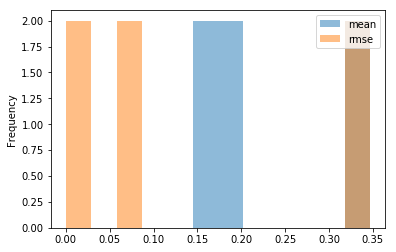

In [31]:
%matplotlib inline
ax = statistic_table.plot.hist(bins=12, alpha=0.5)

## A 'votes' oszlopból a kiugró értékek helyettesítése az általunk megadott maximum értékkel, majd a modellek ismételt futtatása a 'purgált' adatbázissal

In [32]:
#PURGÁLÁS
zomato_with_id = zomato.reset_index()
purged_dataset = dataset.copy()
#purged_dataset = dataset.drop(dataset[dataset["votes"] > 5000].index)
purged_dataset["votes"].where(purged_dataset["votes"] < 5000, 5000, inplace=True)
print(purged_dataset.shape)
purged_dataset = purged_dataset.reset_index()

second_train_set, second_test_set = split_train_test_by_id(purged_dataset, 0.2, "index")
second_train_labels = second_train_set['rate']
second_train_set = second_train_set.drop('index', axis=1)
second_test_labels = second_test_set['rate']
second_test_set = second_test_set.drop('index', axis=1)

print("Running Models with MinMax")
trainDataWithGivenScalerAndRunAllModels(second_train_set, second_train_labels,  Normalize, "MinMaxNorm with Purged Data", "Yes")

print("Running Models with StandardScaler")
trainDataWithGivenScalerAndRunAllModels(second_train_set, second_train_labels, standardScaler, "StandardScaler  with Purged Data", "Yes")

(41665, 12)
Running Models with MinMax
Linear Regression with MinMaxNorm with Purged Data
Predictions:	 [3.67306191 3.54588124 3.44592155 3.54935432 4.76167991]
Labels:		    rate
0   3.6
1   3.9
2   3.0
3   3.3
6   4.5


Decision Tree with MinMaxNorm with Purged Data
Scores: [0.20640792 0.2152284  0.21111129 0.20384636 0.19016304 0.2071187
 0.20635125 0.20198471 0.19737626 0.23667256]
Mean: 0.2076260501618222
Standard deviation: 0.01171808124779127


Random forest with MinMaxNorm with Purged Data
Scores: [0.18968896 0.18082047 0.18080911 0.17074261 0.15991271 0.17083612
 0.16963705 0.17397969 0.16895945 0.18411378]
Mean: 0.1749499959203716
Standard deviation: 0.008341494276340336


Running Models with StandardScaler
Linear Regression with StandardScaler  with Purged Data
Predictions:	 [3.67306192 3.54588124 3.44592155 3.54935432 4.76167991]
Labels:		    rate
0   3.6
1   3.9
2   3.0
3   3.3
6   4.5


Decision Tree with StandardScaler  with Purged Data
Scores: [0.21006401 0.21675999 0.21

Látható, hogy a purgált adatbázison (minden, 5000 szavazatnál többel rendelkező adatsorban 5000-re cseréltük a szavazatszámot) minden modell, bármely skálázót is alkalmaztuk, rosszabb eredményt ért el.

A purgálás után során úgy tűnik, negatív módon torzítjuk aza adatot, mely az eredmények romlásához vezetett.

## Feldolgozott (fit hívás) adatbázisok elmentése későbbi használatra

In [33]:
train_set_ready_with_minmax = runPipeline(train_set, True, Normalize)

train_set_ready_with_standard_scaler = runPipeline(train_set, True, standardScaler)

In [34]:
print(train_set_ready_with_minmax.shape)
print(train_set_ready_with_minmax)

(33093, 45)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.17771758e-04 1.54894672e-04 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.35543517e-04 3.09789343e-04 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [6.94853374e-03 9.13878563e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.46508067e-01 1.79368030e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.12672241e-01 4.67627014e-01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


## Korrelációs mátrix vizsgálata

In [35]:
attributes = ['address', 'name', 'online_order', 'book_table', 'votes', 'dish_liked', 'cuisines', 'approx_cost(for two people)'] + type_labels + city_labels + ['rate']
basic_data_for_corr_matrix_df = pd.DataFrame(train_set_ready_with_standard_scaler)
train_labels = train_labels.reset_index(drop=True)
basic_data_for_corr_matrix_df['rate'] = train_labels
basic_data_for_corr_matrix_df.columns = attributes
corr_matrix = basic_data_for_corr_matrix_df.corr()
corr_matrix["rate"].sort_values(ascending=False)

rate                           1.000000
votes                          0.433262
book_table                     0.420320
approx_cost(for two people)    0.381664
dish_liked                     0.346911
cuisines                       0.127249
Drinks & nightlife             0.115314
Pubs and bars                  0.094351
Buffet                         0.089738
Cafes                          0.071421
Desserts                       0.047381
Church Street                  0.046891
MG Road                        0.045273
Brigade Road                   0.043353
Koramangala 5th Block          0.036447
Residency Road                 0.034100
Koramangala 6th Block          0.032972
Koramangala 4th Block          0.032329
Lavelle Road                   0.032022
Koramangala 7th Block          0.031501
Indiranagar                    0.020176
Malleshwaram                   0.007490
Old Airport Road               0.006388
BTM                            0.005625
Basavanagudi                   0.001726


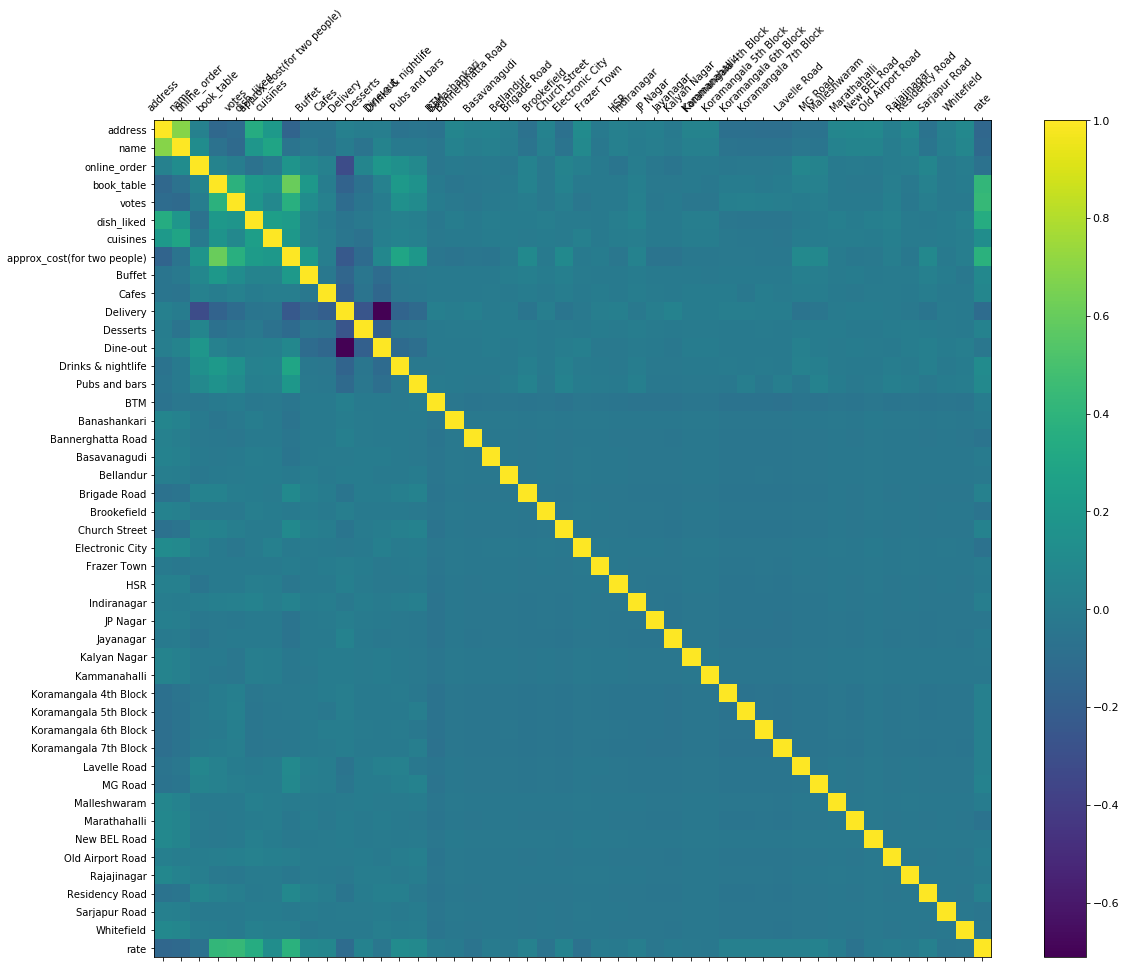

In [36]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(basic_data_for_corr_matrix_df.shape[1]), basic_data_for_corr_matrix_df.columns, fontsize=10, rotation=45)
plt.yticks(range(basic_data_for_corr_matrix_df.shape[1]), basic_data_for_corr_matrix_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=11)

In [37]:
imprtant_attributes = corr_matrix["rate"].sort_values(ascending=False)[:10]
imprtant_attributes = imprtant_attributes.append(corr_matrix["rate"].sort_values(ascending=False)[-7:])
columns_to_keep = imprtant_attributes.index
corr_matrix = corr_matrix.drop(columns=corr_matrix.columns.difference(columns_to_keep))
corr_matrix = corr_matrix.drop(index=corr_matrix.index.difference(columns_to_keep))

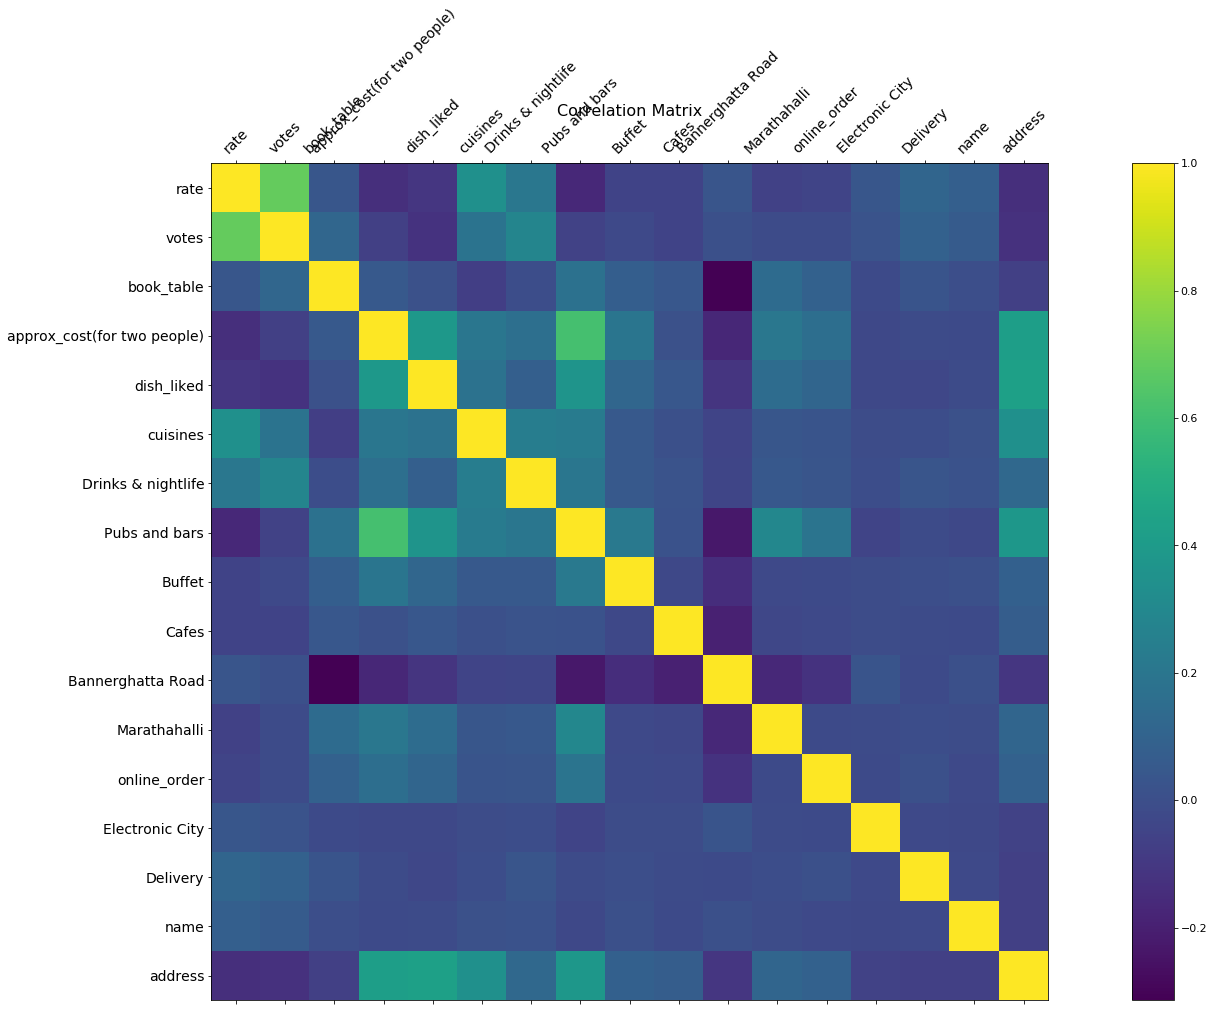

In [38]:
f = plt.figure(figsize=(30, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(17), columns_to_keep, fontsize=14, rotation=45)
plt.yticks(range(17), columns_to_keep, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=11)
plt.title('Correlation Matrix', fontsize=16);

## Modellek elért eredményeinek táblázata

Látható, hogy a RandomForestRegressor éri el konzekvensen a legjobb eredményt, s tizedekkel bár, de a nem purgált dataset-en való, standard skálázást használó verziója a legjobb.

In [39]:
statistic_table

,details,mean,name,purging,rmse,standard deviation
0,MinMaxNorm with Basic Data,0.346836,LinearRegression,No,3.468360e-01,NaN
1,MinMaxNorm with Basic Data,0.193950,DecisionTreeRegressor,No,5.643276e-16,0.00744408
2,MinMaxNorm with Basic Data,0.163784,RandomForestRegressor,No,6.659903e-02,0.00636214
3,StandardScaler with Basic Data,0.346836,LinearRegression,No,3.468360e-01,NaN
4,StandardScaler with Basic Data,0.193833,DecisionTreeRegressor,No,5.655618e-16,0.00749986
5,StandardScaler with Basic Data,0.161588,RandomForestRegressor,No,6.714777e-02,0.0044272
6,MinMaxNorm with Purged Data,0.343622,LinearRegression,Yes,3.436215e-01,NaN
7,MinMaxNorm with Purged Data,0.207626,DecisionTreeRegressor,Yes,5.640583e-16,0.0117181
8,MinMaxNorm with Purged Data,0.174950,RandomForestRegressor,Yes,7.217813e-02,0.00834149
9,StandardScaler with Purged Data,0.343622,LinearRegression,Yes,3.436215e-01,NaN


## Legjobb hiperparaméterek keresése a legjobb eddigi modellhez (Basic Dataset)

RandomForestRegressor modellhez hiperparaméterek keresése GridSearchCV class segítségével:

In [40]:
param_grid = [
     {'bootstrap': [False], 'n_estimators': [10, 15, 20], 'max_features': [3, 5, 10]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(train_set_ready_with_standard_scaler, train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'bootstrap': [False], 'n_estimators': [10, 15, 20], 'max_features': [3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [41]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'bootstrap': False, 'max_features': 10, 'n_estimators': 20}
RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)


In [42]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
print('min: ', np.sqrt(-cvres["mean_test_score"].max()))

0.2639535200217584 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.26078781302951926 {'bootstrap': False, 'max_features': 3, 'n_estimators': 15}
0.2553900430896402 {'bootstrap': False, 'max_features': 3, 'n_estimators': 20}
0.21717280624015364 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}
0.2111237719309911 {'bootstrap': False, 'max_features': 5, 'n_estimators': 15}
0.20853053405168737 {'bootstrap': False, 'max_features': 5, 'n_estimators': 20}
0.1624466654221001 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
0.15568299255206217 {'bootstrap': False, 'max_features': 10, 'n_estimators': 15}
0.15413019283623924 {'bootstrap': False, 'max_features': 10, 'n_estimators': 20}
min:  0.15413019283623924


RandomForestRegressor modellhez hiperparaméterek keresése RandomSearchCV class segítségével:

(mivel sokáig fut, és mindig azonos eredményt ért el, mint a gridSerachCV, így kikommenteztük)

In [43]:
#from sklearn.model_selection import RandomizedSearchCV
#forest_reg = RandomForestRegressor()
#from scipy.stats import randint as sp_randint
#param_dist = {
 #             "max_features": sp_randint(2, 45),
  #            "bootstrap": [True, False],
  #            'n_estimators': sp_randint(3, 10)}
#n_iter_search = 10
#rand_search = RandomizedSearchCV(forest_reg,param_distributions=param_dist, n_iter=n_iter_search, cv=10, scoring='neg_mean_squared_error')
#rand_search.fit(train_set_ready_with_minmax, train_labels)


## Csak a vizualizáció kedvéért újra lefuttatás

A legjobb becslő (modell + hiperparaméterek) által tippelt és a valós rate értékek közötti átlagos hiba ábrázolása.

In [44]:
best_predictions = grid_search.best_estimator_.predict(train_set_ready_with_standard_scaler)
abs_error_array = abs(best_predictions - train_labels)

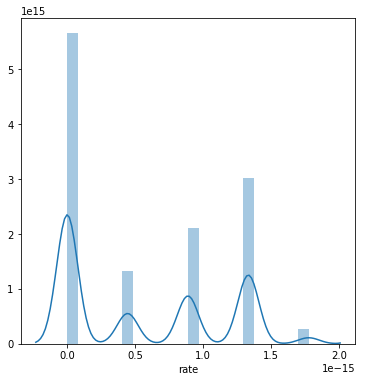

In [45]:
plt.figure(figsize=(6,6))
sns.distplot(abs_error_array)
plt.show()

A legjobb becslő által, cross validation során elért rmse-átlagértékek ábrázolva:

In [46]:
best_estimator_scores_ = cross_val_score(grid_search.best_estimator_, train_set_ready_with_standard_scaler, train_labels, scoring="neg_mean_squared_error", cv=10)
best_estimator_scores = np.sqrt(-best_estimator_scores_)

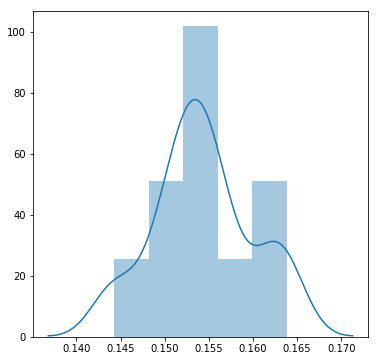

In [47]:
plt.figure(figsize=(6,6))
sns.distplot(best_estimator_scores)
plt.show()

## Az egyes attribútumok 'fontossága' a predikcióban

A legjobb becslő által fontosnak gondolt feature-ök elemzése

In [48]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = ['address', 'name', 'online_order', 'book_table', 'votes', 'dish_liked', 'cuisines', 'approx_cost(for two people)'] + type_labels + city_labels
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2676915326884894, 'votes'),
 (0.17981786448494416, 'dish_liked'),
 (0.11683002129378964, 'approx_cost(for two people)'),
 (0.09811895475842741, 'cuisines'),
 (0.09533542461398169, 'name'),
 (0.08679101931032096, 'address'),
 (0.05466112448969027, 'book_table'),
 (0.013101675515002787, 'online_order'),
 (0.007087052713711598, 'Desserts'),
 (0.005505795449741007, 'Marathahalli'),
 (0.004504541995298024, 'Brookefield'),
 (0.0038802254494799846, 'Whitefield'),
 (0.003846105674463337, 'Delivery'),
 (0.003662846572749379, 'Electronic City'),
 (0.0035352422681510995, 'Indiranagar'),
 (0.0035318229951706824, 'Dine-out'),
 (0.003465040397218594, 'Sarjapur Road'),
 (0.003429048163804844, 'Old Airport Road'),
 (0.0029678298744327787, 'Bannerghatta Road'),
 (0.0029046734638006238, 'Bellandur'),
 (0.002797073485563887, 'Cafes'),
 (0.0027243058008943827, 'HSR'),
 (0.0024030662118608445, 'JP Nagar'),
 (0.0021159407638698885, 'Rajajinagar'),
 (0.0020986996597711473, 'Malleshwaram'),
 (0.0019961833

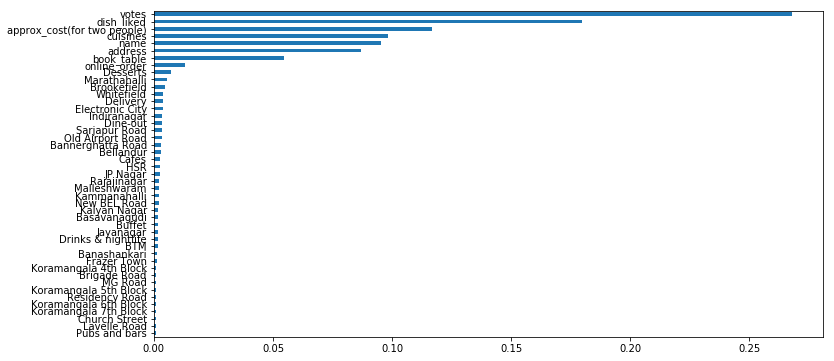

In [49]:
plot_importances(grid_search.best_estimator_, attributes)

## Végül a teszt szetten futtatás, mérés (Basic dataset)

In [50]:
final_model = grid_search.best_estimator_

X_test = runPipeline(test_set, False, standardScaler)
y_test = test_labels

In [51]:
print(len(y_test))
X_test_df = pd.DataFrame(X_test)
final_predictions = final_model.predict(X_test_df)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)
printToTestStatistics("Test with Basic Data", final_rmse)

8572
Scores: 0.3207800258926136
Mean: 0.3207800258926136
Standard deviation: 0.0




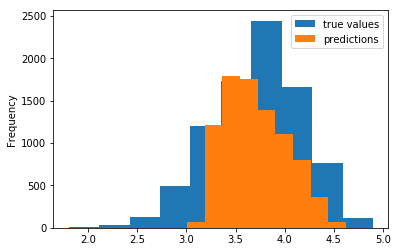

In [52]:
y_test.plot(kind='hist', label='true values')
pd.Series(final_predictions).plot(kind='hist', label='predictions')
plt.legend()

## Model vizsgálata, mi alapján dönt a döntési fa

In [53]:
def convert_dot_to_png(model, max_depth=5, feature_names=list(attributes)):
    export_graphviz(model.estimators_[0], out_file='tree.dot', max_depth=max_depth, feature_names=feature_names, rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    graph.write_png('tree.png')

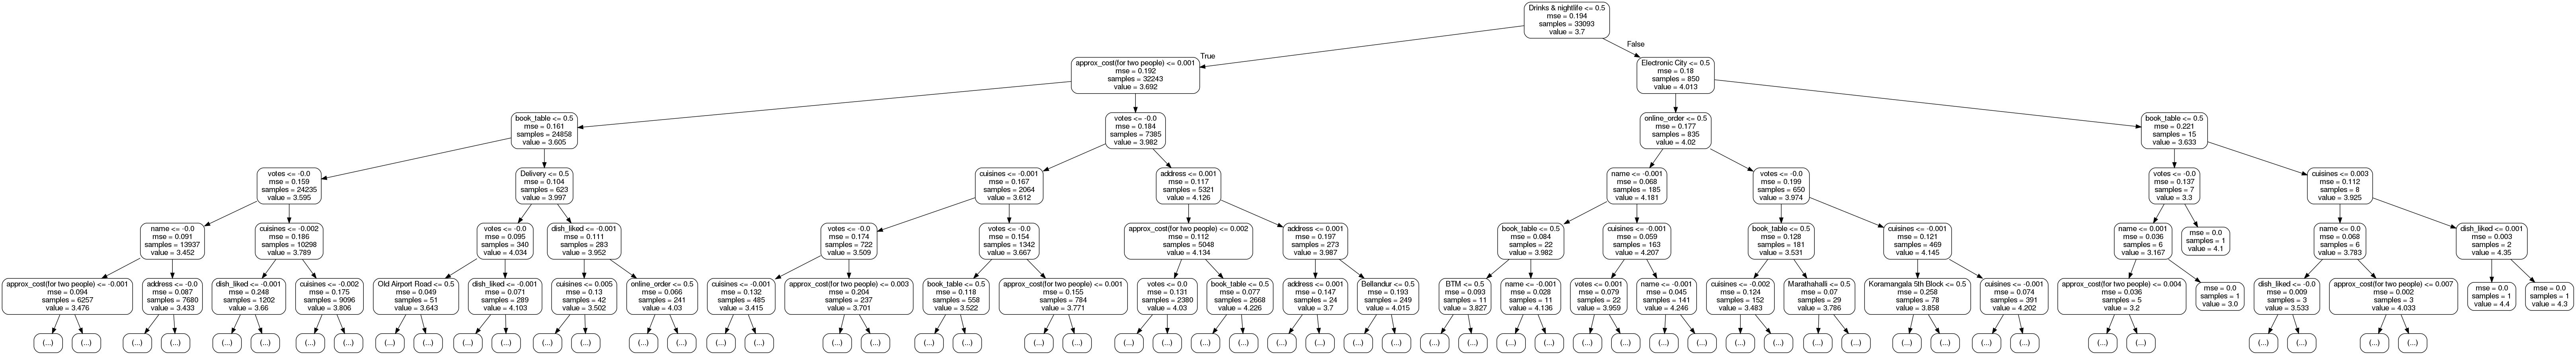

In [54]:
convert_dot_to_png(final_model)
Image('tree.png')

## Lokáció (GPS koordináták) hozzáadása

Geopy segítségével a lokációk koordiánátinak lekérése.

In [55]:
def get_lat_lon(df):
    locations=pd.DataFrame({"Name":zomato['location'].unique()})
    locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
    lat=[]
    lon=[]
    geolocator=Nominatim(user_agent="app")
    for location in locations['Name']:
        location = geolocator.geocode(location)
        if location is None:
            lat.append(np.nan)
            lon.append(np.nan)
        else:    
            lat.append(location.latitude)
            lon.append(location.longitude)
    locations['lat']=lat
    locations['lon']=lon
    return locations

In [80]:
zomato_loc = backup_zomato.copy()
locations=pd.DataFrame({"Name":zomato_loc['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

locations['geo_loc']=lat_lon

GeocoderUnavailable: Service not available

In [76]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangalore","")[1:])
locations.head()

,Name
0,BTM
1,Brigade Road
2,Bellandur
3,Ejipura
4,HSR


In [ ]:
Rest_locations=pd.DataFrame(zomato_loc['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Rest_locations['count'].max()

In [ ]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [ ]:
basemap

A helyek összepárosítása a gps koordinátákkal.

In [ ]:
loc_dict = dict(zip(zomato_loc['location'].unique(), locations['geo_loc']))
loc_array = list()
for x in zomato_loc['location']:
    loc_array.append(loc_dict[x])

NaN értékek lecserélése (-1, -1)-ekre a gps koordinátáknál.

In [ ]:
nan_free_loc_array = []
for x in loc_array:
    if(x != x):
        nan_free_loc_array.append((-1, -1))
    else:
        nan_free_loc_array.append(x)

## Új dataset létrehozása (Lat Lon dataset), azon szokásos feldolgozás elvégzése

In [ ]:
extended_dataset = zomato.copy()
cleaned_rate_labels = []

list_of_lat = [x[0] for x in nan_free_loc_array]
list_of_lon = [x[1] for x in nan_free_loc_array]

extended_dataset['lat'] = list_of_lat
extended_dataset['lon'] = list_of_lon

extended_dataset = extended_dataset.loc[extended_dataset['rate'] !='NEW']
extended_dataset = extended_dataset.loc[extended_dataset['rate'] !='-'].reset_index(drop=True)

for n in extended_dataset['rate']:
    cleaned_rate_labels.append(float(cleanRates(n)))
extended_dataset['rate'] = cleaned_rate_labels
extended_dataset = extended_dataset.drop(extended_dataset[np.isnan(extended_dataset['rate'])].index)

extended_dataset = extended_dataset.reset_index()

extended_train_set, extended_test_set = split_train_test_by_id(extended_dataset, 0.2, "index")

extended_train_labels = extended_train_set['rate']
extended_train_set = extended_train_set.drop('index', axis=1)
extended_test_labels = extended_test_set['rate']
extended_test_set = extended_test_set.drop('index', axis=1)

Az új attribútumok skálázása külön, hiszen ez előtt meghívva nem léteznek még, így a függvényben nem kivitelezhető.

Skálázatlan oszlopok kimentése a későbbi vizualizációra való felhasználásra.

In [ ]:
not_scaled_extended_train_set = pd.DataFrame()
not_scaled_extended_train_set['lat'] = extended_train_set['lat']
not_scaled_extended_train_set['lon'] = extended_train_set['lon']

extended_train_set['lat'] = standardScaler(extended_train_set['lat'], "lat", True)
extended_train_set['lon'] = standardScaler(extended_train_set['lon'], "lon", True)

extended_test_set['lat'] = standardScaler(extended_test_set['lat'], "lat", False)
extended_test_set['lon'] = standardScaler(extended_test_set['lon'], "lon", False)


A nem új feature-ökhöz tartozó adat végigfuttatása a Pipeline-on, majd modellek kpróbálása, feldolgozott dataset elmentése (extended_train_set_ready_with_standard_scaler).

In [ ]:
trainDataWithGivenScalerAndRunAllModels(extended_train_set, extended_train_labels,  standardScaler, "StandardScaler with Lat Lon Data", "No")

In [ ]:
extended_train_set_ready_with_standard_scaler = runPipeline(extended_train_set, True, standardScaler)

## GridSearch Cross Validation lefuttatása (Lat Lon dataset)

In [ ]:
grid_search.fit(extended_train_set_ready_with_standard_scaler, extended_train_labels)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
print('min: ', np.sqrt(-cvres["mean_test_score"].max()))

## A legjobb becslő általi eredmények megjelenítése (Lat Lon dataset)

In [ ]:
best_predictions = grid_search.best_estimator_.predict(extended_train_set_ready_with_standard_scaler)

In [ ]:
best_estimator_scores_ = cross_val_score(grid_search.best_estimator_, extended_train_set_ready_with_standard_scaler, extended_train_labels, scoring="neg_mean_squared_error", cv=10)
best_estimator_scores = np.sqrt(-best_estimator_scores_)
best_estimator_scores

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(best_estimator_scores)
plt.show()

In [ ]:
attributes = ['address', 'name', 'online_order', 'book_table', 'votes', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'lat', 'lot'] + type_labels + city_labels
sorted(zip(feature_importances, attributes), reverse=True)

## Teszt lefuttatása végül, eredmény kijelzése (Lat Lon dataset)

In [ ]:
final_model = grid_search.best_estimator_

X_extended_test = runPipeline(extended_test_set, False, standardScaler)
y_extended_test = extended_test_labels
print(len(y_test))
X_extended_test_df = pd.DataFrame(X_extended_test)
final_predictions = final_model.predict(X_extended_test_df)
final_mse = mean_squared_error(y_extended_test, final_predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)
printToTestStatistics("Test with Lat Lon Data", final_rmse)
y_extended_test.plot(kind='hist', label='true values')
pd.Series(final_predictions).plot(kind='hist', label='predictions')
plt.legend()

## K-Means klaszterezéssel GPS koordináták csoportokba sorolása

Az előbb elmentett "extended_train_set" felhasználása, belőle a 'lat' és a 'lon' feature-ök kinyerése

In [ ]:
coord_cols_train_df = pd.DataFrame()
coord_cols_train_df['lat'] = extended_train_set['lat']
coord_cols_train_df['lon'] = extended_train_set['lon']

In [ ]:
coord_cols_train = np.array(coord_cols_train_df)

### Klaszterezés lefuttatása

In [ ]:
km = KMeans()
y_km = km.fit_predict(coord_cols_train)

### Klaszterezés megjelenítése koordináták alapján

In [ ]:
coord_cols_df = pd.DataFrame()
coord_cols_df['lat'] = not_scaled_extended_train_set['lat']
coord_cols_df['lon'] = not_scaled_extended_train_set['lon']
coord_cols_ = np.array(coord_cols_df)

Kiszedjük a -1-es sorokat, hogy meg tudjuk állapítani a legkisebb értékeket, amikkel körbehatárolhatjuk a térképet a vizualizációnál.

In [ ]:
coord_cols_del = [x for x in coord_cols_ if x[0] != -1.0] 

In [ ]:
lower_lat = min(coord_cols_del, key = lambda t: t[1])[1] 
lower_lon = min(coord_cols_del, key = lambda t: t[0])[0]
upper_lat = max(coord_cols_del, key = lambda t: t[1])[1]
upper_lon = max(coord_cols_del, key = lambda t: t[0])[0]

In [ ]:
print(lower_lat)
print(lower_lon)
print(upper_lat)
print(upper_lon)

Kiszedjük az egyedi értékeket (először tuple formába konvertáljuk, hogy megmaradjanak az adatkettesek), a hozzájuk tartozó "zónákkal" párban.

In [ ]:
tuple_coords = []
for x in coord_cols_:
    tuple_coords.append((x[0], x[1]))
unique_tuple_coords = np.unique(tuple_coords, return_index = True, axis = 0)   
unique_y_km = []
for x in unique_tuple_coords[1]:
    unique_y_km.append(y_km[x])

Kiíratjuk, mely zónába hány, egyedi koordináátkkal rendelkező étterem van (ennyi pontunk lesz)

In [ ]:
Counter(unique_y_km)

Kirajzoltatjuk az egyedi koordinátákat (hiszen nem lehet/ nincs értelme ugyanazt a pontot többször), különböző zónákat különböző színnel. Itt viszont az eredeti koordinátákat kell felhasználnunk, hiszen a skálázott értékekkel nem lehet jól vizualizálni.

In [ ]:
m=Basemap(llcrnrlon = lower_lon - 0.1, llcrnrlat = lower_lat - 0.1, urcrnrlon = upper_lon + 0.1 , urcrnrlat = upper_lat + 0.1)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")

for coord, zona in zip(unique_tuple_coords[0], unique_y_km):
    if zona == 0:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="black", markeredgecolor="black", markeredgewidth=1)
    if zona == 1:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)
    if zona == 2:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="red", markeredgecolor="black", markeredgewidth=1)
    if zona == 3:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="yellow", markeredgecolor="black", markeredgewidth=1)
    if zona == 4:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="blue", markeredgecolor="black", markeredgewidth=1)
    if zona == 5:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="green", markeredgecolor="black", markeredgewidth=1)
    if zona == 6:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="brown", markeredgecolor="black", markeredgewidth=1)
    if zona == 7:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="purple", markeredgecolor="black", markeredgewidth=1)
        

## Új dataset létrehozása  (Zones dataset), azon szokásos feldolgozás elvégzése

In [ ]:
dataset_with_zones = zomato.copy()
cleaned_rate_labels = []

dataset_with_zones = dataset_with_zones.loc[dataset_with_zones['rate'] !='NEW']
dataset_with_zones = dataset_with_zones.loc[dataset_with_zones['rate'] !='-'].reset_index(drop=True)

for n in dataset_with_zones['rate']:
    cleaned_rate_labels.append(float(cleanRates(n)))
dataset_with_zones['rate'] = cleaned_rate_labels
dataset_with_zones = dataset_with_zones.drop(dataset_with_zones[np.isnan(dataset_with_zones['rate'])].index)

dataset_with_zones = dataset_with_zones.reset_index()

zones_train_set, zones_test_set = split_train_test_by_id(dataset_with_zones, 0.2, "index")

zones_train_labels = zones_train_set['rate']
zones_train_set = zones_train_set.drop('index', axis=1)
zones_train_set['zone'] = y_km
zones_test_labels = zones_test_set['rate']
zones_test_set = zones_test_set.drop('index', axis=1)

In [ ]:
trainDataWithGivenScalerAndRunAllModels(zones_train_set, zones_train_labels,  standardScaler, "StandardScaler with Zones Data", "No")

Az adatok végigfuttatása a Pipeline-on, feldolgozott dataset elmentése (zones_train_set_ready_with_standard_scaler).

In [ ]:
zones_train_set_ready_with_standard_scaler = runPipeline(zones_train_set, True, standardScaler)

## GridSearch Cross Validation lefuttatása (Zones dataset)

In [ ]:
grid_search.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
print('min: ', np.sqrt(-cvres["mean_test_score"].max()))

## A legjobb becslő általi eredmények megjelenítése (Zones dataset)

In [ ]:
best_predictions = grid_search.best_estimator_.predict(zones_train_set_ready_with_standard_scaler)

In [ ]:
best_estimator_scores_ = cross_val_score(grid_search.best_estimator_, zones_train_set_ready_with_standard_scaler, zones_train_labels, scoring="neg_mean_squared_error", cv=10)
best_estimator_scores = np.sqrt(-best_estimator_scores_)
best_estimator_scores

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(best_estimator_scores)
plt.show()

In [ ]:
attributes = ['address', 'name', 'online_order', 'book_table', 'votes', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'zones'] + type_labels + city_labels
sorted(zip(feature_importances, attributes), reverse=True)

## Test set-hez zónák predikciója KNN algo-val

In [ ]:
X_loc = coord_cols_train.copy()
y_loc = y_km.copy()

Először a train szettet is szétszedjük és azon betanítjuk a K Nearest Neighbors klaszterezésre használt modellt, majd ellenőrizzük is helyes működését.

In [ ]:
X_loc_train, X_loc_test, y_loc_train, y_loc_test = train_test_split(X_loc, y_loc, test_size=0.20) 

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_loc_train, y_loc_train)

In [ ]:
y_pred = classifier.predict(X_loc_test)  

Amint látni, 100%-ig egyeznek a prediktált értékek. Így feltételezhetjük, hogy a test set adatsoraihoz is helyesen fogja megjósolni a zónákat

In [ ]:
print(confusion_matrix(y_loc_test, y_pred))  
print(classification_report(y_loc_test, y_pred)) 

A teszt szetten is megjósoljuk a kategóriákat és hozzáadjuk a teszt szetthez az oszlopot.

In [ ]:
coord_cols_test_df = pd.DataFrame()
coord_cols_test_df['lat'] = extended_test_set['lat']
coord_cols_test_df['lon'] = extended_test_set['lon']
coord_cols_test = np.array(coord_cols_test_df)

y_test_pred = classifier.predict(coord_cols_test)  

In [ ]:
zones_test_set['zones'] = y_test_pred

## Teszt lefuttatása végül, eredmény kijelzése (Zones dataset)

In [ ]:
final_model = grid_search.best_estimator_

X_zones_test = runPipeline(zones_test_set, False, standardScaler)
y_zones_test = zones_test_labels
print(len(y_test))
X_zones_test_df = pd.DataFrame(X_zones_test)
final_predictions = final_model.predict(X_zones_test_df)
final_mse = mean_squared_error(y_zones_test, final_predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)
printToTestStatistics("Test with Zones Data", final_rmse)
y_zones_test.plot(kind='hist', label='true values')
pd.Series(final_predictions).plot(kind='hist', label='predictions')
plt.legend()

## Elért eredmények újabb csekkolása

In [ ]:
statistic_table.sort_values(by=['mean'])

In [ ]:
test_statistic_table.sort_values(by=['score'])

## Ensamble Methods

### BaggingRegressor

Megadható, hogy hány darab, és milyen modellt használjon. Minden modellt betanít a train set egy részét felhaználva, majd maga a modell kimenete az egyes modellek által jósolt eredményekból adódik. A kiválasztás menete lehetséges soft voting vagy hard voting alkalmazása által. 

Osztályzási problémák esetén a hard voting során a legtöbb szavaztot kapott oszály lesz az output, soft voting esetén pedig minden oszályhoz tartozik egy valószínűség (ha ilyet képesek mondani a modellek, amiket használ), és ezek közül a legnagyobb valószínűségű osztály nyer.

Regressziós feladat során lehet hard voting-ot alkalmazni, vagy a prediktált értékek mediánját/átlagát venni.

Az, hogy a train set mely részét használja fel, a bootstrap értékétől függ. Ha True, akkor bagging van, azaz lehetséges, hogy a random kiválasztott adatsorok között ugyanaz az adatsor többször is előfordul egy betanítandó mdellhez tartozó train subset-ben, míg ha False, akkor pasting van, azaz nem lehetséges többszörös előfordulása egy adatsornak egy subset-ben. Ettől függetlenül pasting során is kiveheti ugyanazt az adatsort több alkalommal a modell, de csak különböző modellekhez tartozó subsetek alkotása során.

In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_reg = BaggingRegressor(LinearRegression(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_reg.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)
bag_reg_pred = bag_reg.predict(zones_train_set_ready_with_standard_scaler)
bag_reg_mse = mean_squared_error(zones_train_labels, bag_reg_pred)
bag_reg_mse = np.sqrt(bag_reg_mse)
print(bag_reg_mse)
print(bag_reg.oob_score_)

In [ ]:
bag_reg_pred = bag_reg.predict(X_zones_test)
bag_reg_mse = mean_squared_error(y_zones_test, bag_reg_pred)
bag_reg_mse = np.sqrt(bag_reg_mse)
print(bag_reg_mse)

### AdaBoost

Megadható, milyen modellekből építezzen. n_estimator számú modellt hoz létre, melyek közül az elsőt egyszerűen betanítja az étteremadatok-label párossal úgy, hogy minden adatsor súlya egységnyi. Eztán a következő modellnél az adatsorok súlyai úgy frissülnek, hogy a nem eltalált adatsorok súlyai nőnek, azaz nagyobb hangsúlyt fektet a modell ezeknek az eltalálására. 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=200, learning_rate=0.2)
ada_reg.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)
ada_reg_pred = ada_reg.predict(zones_train_set_ready_with_standard_scaler)
ada_reg_mse = mean_squared_error(zones_train_labels, ada_reg_pred)
ada_reg_mse = np.sqrt(ada_reg_mse)
print(ada_reg_mse)

In [ ]:
ada_reg_pred = ada_reg.predict(X_zones_test)
ada_reg_mse = mean_squared_error(y_zones_test, ada_reg_pred)
ada_reg_mse = np.sqrt(ada_reg_mse)
print(ada_reg_mse)

### GradientBoostingRegressor

n_estimators számú DecisionTree-t hoz létre, mindegyiknél jelenleg egy döntést hoz(max_depth=2), és mindet sorban a előző hibáival tanítja be. Azaz, az első fa még a normális étteremadatok-label párost kapja be, a második fa viszont már az étterem adatai mellé nem a rate-értékeket, hanem az első fa által, rate  tippelés közben okozott hibákat kapja be, és így tovább az összes fa során. Végül a modell predikciója az összes fa predikcijóinak összege. 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor #whatwhat TODO

gradboost_zones_train, gradboost_zones_val, gradboost_zones_train_labels, gradboost_zones_val_labels = train_test_split(zones_train_set_ready_with_standard_scaler, zones_train_labels)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=1000)
gbrt.fit(gradboost_zones_train, gradboost_zones_train_labels)
    
errors = [mean_squared_error(gradboost_zones_val_labels, y_pred) 
          for y_pred in gbrt.staged_predict(gradboost_zones_val)]
bst_n_estimators = np.argmin(errors)
print(bst_n_estimators)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(gradboost_zones_train, gradboost_zones_train_labels)
gbrt_best_pred = gbrt_best.predict(gradboost_zones_train)
gbrt_best_mse = mean_squared_error(gradboost_zones_train_labels, gbrt_best_pred)
gbrt_best_mse = np.sqrt(gbrt_best_mse)
gbrt_best_mse

In [ ]:
gbrt_best_pred = gbrt_best.predict(X_zones_test)
gbrt_best_mse = mean_squared_error(y_zones_test, gbrt_best_pred)
gbrt_best_mse = np.sqrt(gbrt_best_mse)
gbrt_best_mse

### Stacking